In [3]:
# Task 5: Personal Loan Acceptance Prediction

# 🔹 Import Required Libraries
# -----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


In [5]:
# -----------------------------------
# 🔹 Load Dataset
# -----------------------------------
df = pd.read_csv("bank-full.csv", sep=';')  # make sure file is in the same folder

print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
display(df.head())

print("\nSummary Statistics:")
display(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (45211, 17)

Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



Summary Statistics:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000



Missing Values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
# -----------------------------------
# 🔹 Encode Categorical Columns
# -----------------------------------
# Columns: job, marital, education, default, housing, loan, contact, month, poutcome, y
cat_cols = ["job","marital","education","default","housing","loan","contact","month","poutcome","y"]

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("✅ Categorical columns encoded successfully.")
display(df.head())


✅ Categorical columns encoded successfully.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


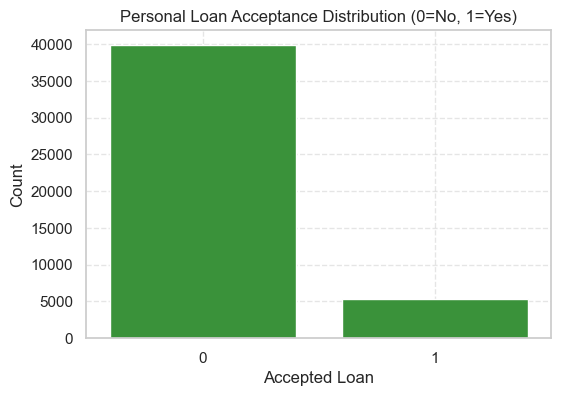

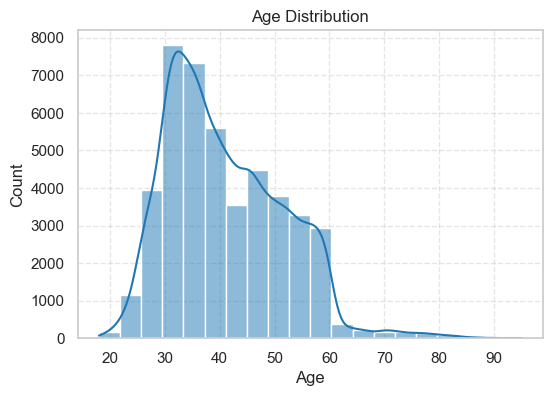

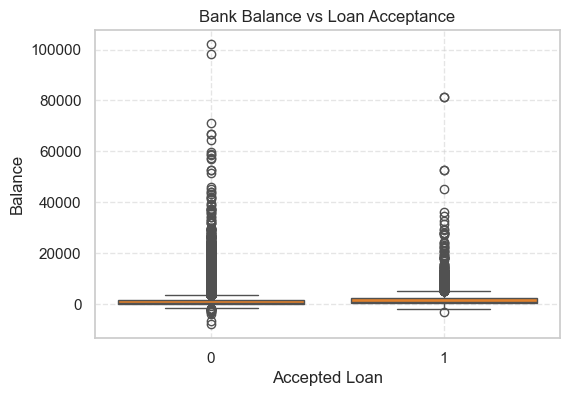

In [9]:
# -----------------------------------
# 🔹 EDA – Target Distribution
# -----------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="y", data=df, color="#2ca02c")
plt.title("Personal Loan Acceptance Distribution (0=No, 1=Yes)")
plt.xlabel("Accepted Loan")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["age"], bins=20, kde=True, color="#1f77b4")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Balance vs Target
plt.figure(figsize=(6,4))
sns.boxplot(x="y", y="balance", data=df, color="#ff7f0e")
plt.title("Bank Balance vs Loan Acceptance")
plt.xlabel("Accepted Loan")
plt.ylabel("Balance")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [11]:
# -----------------------------------
# 🔹 Features & Target
# -----------------------------------
X = df.drop("y", axis=1)
y = df["y"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)


Training Set: (33908, 16)
Testing Set: (11303, 16)


In [13]:
# -----------------------------------
# 🔹 Scale Numeric Features
# -----------------------------------
numeric_cols = ["age","balance","day","duration","campaign","pdays","previous"]
scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("✅ Feature scaling completed.")


✅ Feature scaling completed.


In [15]:
# -----------------------------------
# 🔹 Logistic Regression
# -----------------------------------
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("🔹 Logistic Regression Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr),3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Results:
Accuracy: 0.889

Confusion Matrix:
 [[9747  203]
 [1054  299]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      9950
           1       0.60      0.22      0.32      1353

    accuracy                           0.89     11303
   macro avg       0.75      0.60      0.63     11303
weighted avg       0.87      0.89      0.87     11303



In [17]:
# -----------------------------------
# 🔹 Decision Tree Classifier
# -----------------------------------
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("🔹 Decision Tree Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt),3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


🔹 Decision Tree Results:
Accuracy: 0.893

Confusion Matrix:
 [[9590  360]
 [ 846  507]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      9950
           1       0.58      0.37      0.46      1353

    accuracy                           0.89     11303
   macro avg       0.75      0.67      0.70     11303
weighted avg       0.88      0.89      0.88     11303



In [18]:
# -----------------------------------
# 🔹 Insights & Conclusion
# -----------------------------------
print("✅ Key Insights:")
print("- Customers with higher balance and more previous contacts are more likely to accept the loan.")
print("- Logistic Regression and Decision Tree give similar accuracy (~90%), showing strong patterns in the data.")
print("- Decision Tree can be further tuned for better interpretability.")
print("- Age, balance, and previous campaign contacts are among the most influential features.")
print("\n✅ Task 5 Completed Successfully!")


✅ Key Insights:
- Customers with higher balance and more previous contacts are more likely to accept the loan.
- Logistic Regression and Decision Tree give similar accuracy (~90%), showing strong patterns in the data.
- Decision Tree can be further tuned for better interpretability.
- Age, balance, and previous campaign contacts are among the most influential features.

✅ Task 5 Completed Successfully!
